In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df = pd.read_csv("dataset.csv")
df

,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [3]:
df.dtypes

index                 int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [4]:
df.isna().sum()

index               0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [5]:
df['track_genre'].value_counts()

track_genre
acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
                     ... 
folk                 1000
emo                  1000
electronic           1000
electro              1000
world-music          1000
Name: count, Length: 114, dtype: int64

In [6]:
df = df.dropna(subset=['artists', 'album_name', 'track_name'])

In [7]:
X_numeric = df[
    [
        'danceability', 'energy', 'loudness', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness',
        'valence', 'tempo', 'duration_ms', 'explicit'
    ]
]

genre_dummies = pd.get_dummies(df['track_genre'], drop_first=True)

X = pd.concat([X_numeric, genre_dummies], axis=1)


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
y = df['popularity']

In [10]:
X_scaled = sm.add_constant(X)

In [11]:
model = sm.OLS(y, X_scaled.astype(float)).fit()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     321.4
Date:                Fri, 19 Dec 2025   Prob (F-statistic):               0.00
Time:                        19:21:12   Log-Likelihood:            -4.9860e+05
No. Observations:              113999   AIC:                         9.974e+05
Df Residuals:                  113874   BIC:                         9.987e+05
Df Model:                         124                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                44.0165      0.858     51.278      0.000      42.334      45.699
danceability          6.2233      0.486     12.807      0.000       5.271       7.176
energy               -3.6954      0.505     -7.315      0.000      -4.686      -2.705
loudness              0.1081      0.023      4.793      0.000       0.064       0.152
speechiness          -3.9518      0.750     -5.268      0.000      -5.422      -2.482
acousticness         -1.6905      0.296     -5.707      0.000      -2.271      -1.110
instrumentalness     -1.0190      0.268     -3.807      0.000      -1.544      -0.494
liveness             -1.0973      0.335     -3.273      0.001      -1.754      -0.440
valence              -5.2799      0.307    -17.180      0.000      -5.882      -4.678
tempo                 0.0079      0.002      3.862      0.000       0.004       0.012
duration_ms        7.934e-07   5.87e-07      1.351      0.177   -3.58e-07    1.94e-06
explicit              2.7445      0.228     12.063      0.000       2.299       3.190
afrobeat            -16.5822      0.870    -19.065      0.000     -18.287     -14.877
alt-rock             -7.8204      0.867     -9.015      0.000      -9.521      -6.120
alternative         -18.0328      0.866    -20.818      0.000     -19.731     -16.335
ambient               2.8873      0.881      3.276      0.001       1.160       4.615
anime                 7.0436      0.866      8.130      0.000       5.345       8.742
black-metal         -18.9770      0.891    -21.293      0.000     -20.724     -17.230
bluegrass           -14.9870      0.863    -17.369      0.000     -16.678     -13.296
blues               -10.0693      0.862    -11.684      0.000     -11.759      -8.380
brazil                2.6127      0.864      3.026      0.002       0.920       4.305
breakbeat           -22.0018      0.882    -24.954      0.000     -23.730     -20.274
british               2.0889      0.862      2.424      0.015       0.400       3.778
cantopop             -7.7408      0.860     -9.006      0.000      -9.425      -6.056
chicago-house       -29.9711      0.889    -33.713      0.000     -31.714     -28.229
children             -6.5304      0.865     -7.548      0.000      -8.226      -4.835
chill                10.4984      0.863     12.161      0.000       8.806      12.191
classical           -26.9129      0.884    -30.433      0.000     -28.646     -25.180
club                 -9.2299      0.872    -10.581      0.000     -10.940      -7.520
comedy              -14.6968      1.015    -14.482      0.000     -16.686     -12.708
country             -25.0112      0.861    -29.035      0.000     -26.700     -23.323
dance               -20.3121      0.868    -23.408      0.000     -22.013     -18.611
dancehall            -9.1967      0.873    -10.536      0.000     -10.908

Predictive Performance Analysis

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# refit OLS on training set
model_pred = LinearRegression()
model_pred.fit(X_train, y_train)

# evaluate on test set
y_pred = model_pred.predict(X_test)

r2_test = r2_score(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

r2_test, rmse_test

(0.2614256005723449, 19.14155126802998)

More Analysis

In [14]:
summary_df = model.summary2().tables[1]



In [15]:
top_10_significant = (
    summary_df
    .drop(index='const', errors='ignore')
    .sort_values('P>|t|')
    .head(20)
)

top_10_significant

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
romance,-37.891121,0.864574,-43.826346,0.000000e+00,-39.585673,-36.196569
iranian,-38.947904,0.883243,-44.096488,0.000000e+00,-40.679046,-37.216761
latin,-34.224657,0.867945,-39.431814,0.000000e+00,-35.925816,-32.523497
detroit-techno,-31.069484,0.897325,-34.624557,2.489787e-261,-32.828227,-29.310740
chicago-house,-29.971101,0.889009,-33.712920,6.285715e-248,-31.713546,-28.228656
jazz,-27.769718,0.860960,-32.254368,3.256297e-227,-29.457187,-26.082250
kids,-27.127442,0.872146,-31.104237,1.635708e-211,-28.836835,-25.418049
classical,-26.912874,0.884324,-30.433277,1.303135e-202,-28.646135,-25.179612
idm,-25.957716,0.878841,-29.536312,5.209649e-191,-27.680230,-24.235201
country,-25.011205,0.861420,-29.034871,1.132708e-184,-26.699575,-23.322836


In [16]:
all_genres = sorted(df['track_genre'].unique())

In [17]:
baseline_genre = all_genres[0]

baseline_genre

'acoustic'

In [18]:
coef_df = (
    model
    .summary2()
    .tables[1]
    .reset_index()
    .rename(columns={'index': 'feature'})
)


In [19]:
num_features = [
    'const', 'duration_ms', 'danceability', 'energy', 'key',
    'loudness', 'mode', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence',
    'tempo', 'time_signature', 'explicit'
]

genre_df = coef_df[
    ~coef_df['feature'].isin(num_features)
].copy()

In [20]:
top_genres = genre_df.sort_values('Coef.', ascending=False).head(10)

In [21]:
bottom_genres = genre_df.sort_values('Coef.').head(10)

In [22]:
heatmap_df = pd.concat([top_genres, bottom_genres])
heatmap_df = heatmap_df.set_index('feature')[['Coef.']]

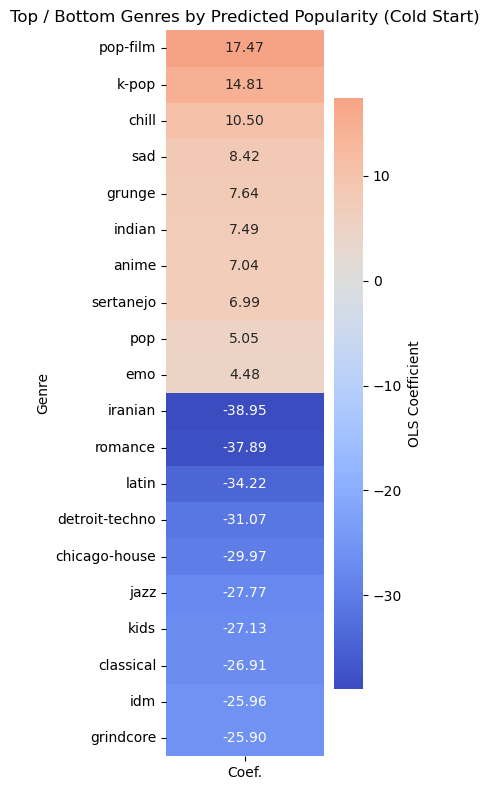

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 8))
sns.heatmap(
    heatmap_df,
    cmap='coolwarm',
    center=0,
    annot=True,
    fmt=".2f",
    cbar_kws={'label': 'OLS Coefficient'}
)
plt.title('Top / Bottom Genres by Predicted Popularity (Cold Start)')
plt.ylabel('Genre')
plt.xlabel('')
plt.tight_layout()
plt.show()